In [50]:
import pandas as pd
import numpy as np
import sys
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [81]:
data = pd.read_csv('GooglePlayStore/googleplaystoremaster.csv')

In [82]:
data.shape

(10841, 13)

In [83]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [84]:
#we only need Category, Content Rating, and Installs
data = data.drop(['App','Rating', 'Reviews', 'Size','Type',
       'Price','Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], axis=1) 

In [97]:
data.head()

,Category,Installs,Content Rating
0,ART_AND_DESIGN,10000,Everyone
1,ART_AND_DESIGN,500000,Everyone
2,ART_AND_DESIGN,5000000,Everyone
3,ART_AND_DESIGN,50000000,Teen
4,ART_AND_DESIGN,100000,Everyone


In [15]:
#want to check correlation between content rating and installs

In [10]:
data.isnull().values.any() #checks for null values and displays "True" if there are any in the data

True

In [99]:
data.dtypes # view data types

Category          object
Installs          object
Content Rating    object
dtype: object

In [95]:
#remove + sign from Installs column
data['Installs']=data['Installs'].str.replace('\+', '', regex=True)

In [96]:
#remove comma from Installs column
data['Installs']=data['Installs'].str.replace('\,', '', regex=True)

In [101]:
#remove wayward text from Installs column
data['Installs']=data['Installs'].str.replace('Free', '', regex=True)

In [103]:
#remove wayward text from Installs column
data['Installs']=data['Installs'].str.replace('', '0', regex=True)

In [104]:
data['Installs'] = data['Installs'].astype(float) #convert installs to a numeric value

In [105]:
data.dtypes #checking that the Installs column has been changed to Float

Category           object
Installs          float64
Content Rating     object
dtype: object

In [106]:
#the space in the middle was causing an issue so rename the column
data.rename(columns={'Content Rating': 'Rating'}, inplace=True)

C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


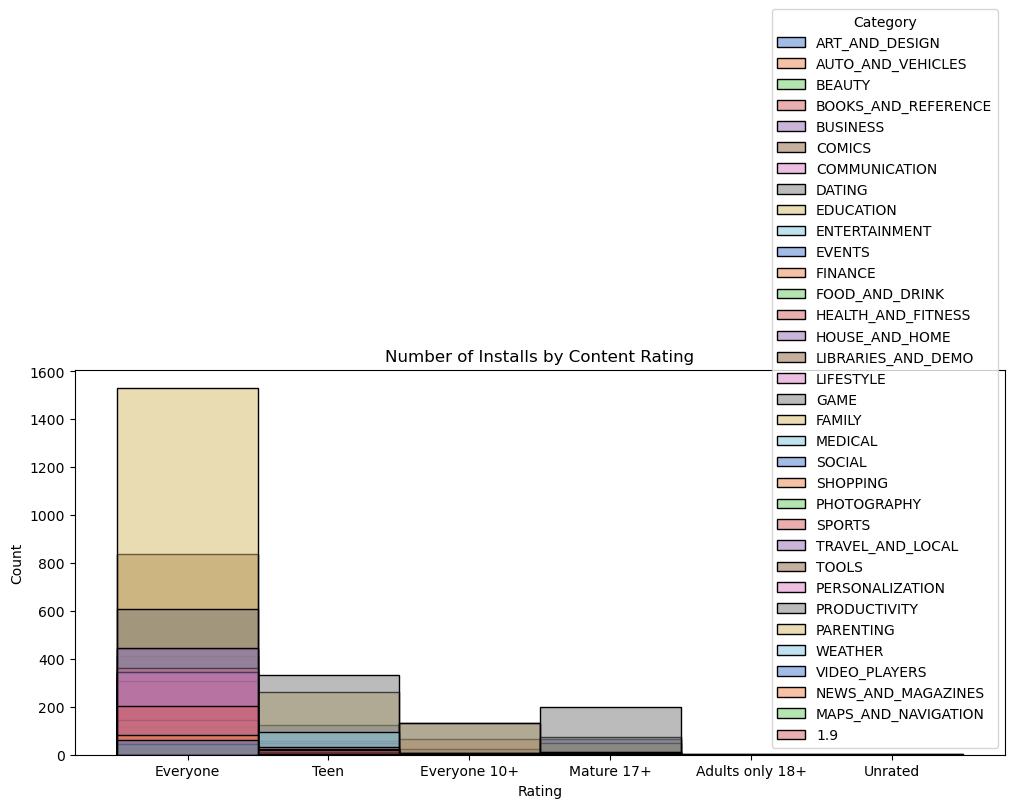

<Figure size 640x480 with 0 Axes>

In [181]:
#histogram
plt.figure(figsize=(12,5))
sns.histplot(data=data,
            x="Rating",
            hue="Category",
            stat="count",
            legend=True,
            palette="muted")
plt.title('Number of Installs by Content Rating')
plt.show()
plt.savefig("InstallsbyContentRating.png") 

In [121]:
#Find the data summary of each content rating

In [109]:
#isolate each rating
everyone=data[data.Rating=="Everyone"]
everyone10=data[data.Rating=="Everyone 10+"]
teen=data[data.Rating=="Teen"]
mature=data[data.Rating=="Mature 17+"]
adult=data[data.Rating=="Adults only 18+"]
unrated=data[data.Rating=="Unrated"]

In [110]:
sumTotal=data.groupby('Rating')['Installs'].agg(['sum', 'mean'])
sumTotal

,sum,mean
Rating,,
Adults only 18+,1.100000e+13,3.666667e+12
Everyone,3.988306e+20,4.576895e+16
Everyone 10+,6.555855e+19,1.583540e+17
Mature 17+,3.947469e+18,7.910760e+15
Teen,1.913141e+20,1.583726e+17
Unrated,5.000500e+09,2.500250e+09


C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


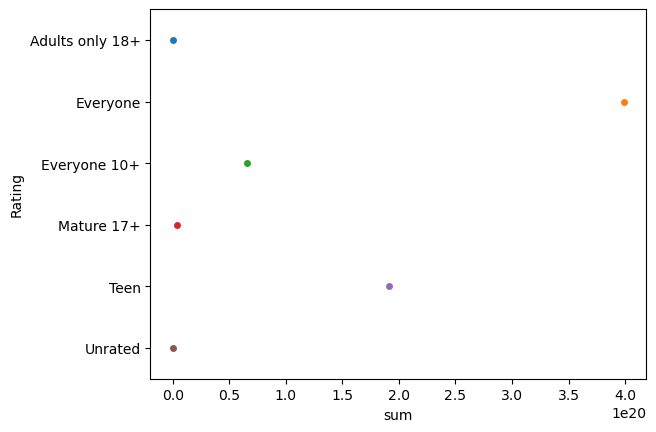

In [178]:
#visualizing the sum
sns.stripplot(data=sumTotal, x="sum", y="Rating", hue="Rating", legend=False)
plt.savefig("InstallsSum.png") 

C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mean', ylabel='Rating'>

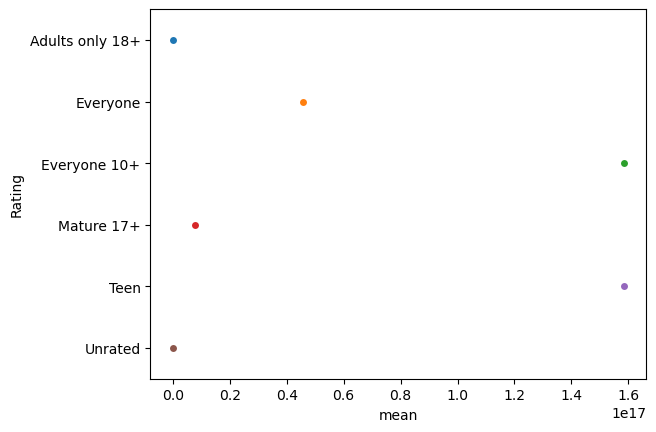

In [180]:
#visualizing the average
sns.stripplot(data=sumTotal, x="mean", y="Rating", hue="Rating", legend=False)

In [159]:
#Everyone has the highest number of installs, so now isolate categories in Everyone
#we will use the data that we isolated out earlier
everyone

,Category,Installs,Rating
0,ART_AND_DESIGN,1.000000e+09,Everyone
1,ART_AND_DESIGN,5.000000e+11,Everyone
2,ART_AND_DESIGN,5.000000e+13,Everyone
4,ART_AND_DESIGN,1.000000e+11,Everyone
5,ART_AND_DESIGN,5.000000e+09,Everyone
...,...,...,...
10835,BUSINESS,1.000000e+03,Everyone
10836,FAMILY,5.000000e+07,Everyone
10837,FAMILY,1.000000e+05,Everyone
10838,MEDICAL,1.000000e+07,Everyone


In [160]:
everyone['Category'].unique() # view unique values in Category column

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [167]:
everyoneCategories=everyone['Category'].value_counts().reset_index(name='Counts') #get a count of apps for each category in Everyone
print(everyoneCategories)

               Category  Counts
0                FAMILY    1529
1                 TOOLS     835
2                  GAME     608
3              BUSINESS     445
4               MEDICAL     442
5          PRODUCTIVITY     413
6               FINANCE     361
7             LIFESTYLE     345
8         COMMUNICATION     345
9                SPORTS     338
10      PERSONALIZATION     322
11          PHOTOGRAPHY     318
12   HEALTH_AND_FITNESS     307
13     TRAVEL_AND_LOCAL     251
14             SHOPPING     208
15  BOOKS_AND_REFERENCE     202
16   NEWS_AND_MAGAZINES     169
17        VIDEO_PLAYERS     146
18            EDUCATION     144
19  MAPS_AND_NAVIGATION     133
20       FOOD_AND_DRINK     117
21               SOCIAL     101
22       HOUSE_AND_HOME      86
23   LIBRARIES_AND_DEMO      85
24    AUTO_AND_VEHICLES      83
25              WEATHER      78
26       ART_AND_DESIGN      61
27            PARENTING      58
28               EVENTS      53
29               BEAUTY      45
30      

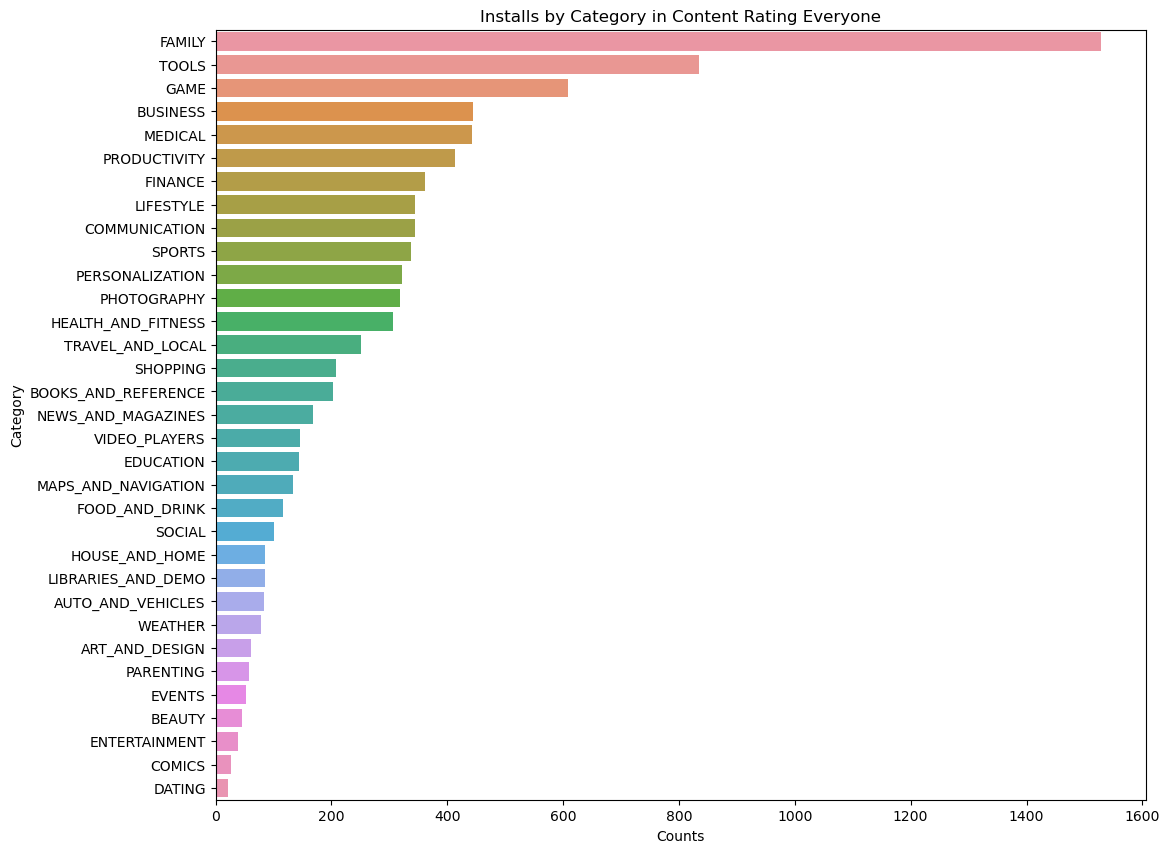

In [177]:
#visualize our data
plt.figure(figsize=(12,10))
sns.barplot(data=everyoneCategories, y="Category", x="Counts")
plt.title('Installs by Category in Content Rating Everyone')
plt.savefig("InstallsbyCategoryEveryone.png") 

In [182]:
everyoneCategories.to_csv('everyoneCategories.csv')